# Descriptive Statistics

* Probability and statistics is used for decision making
* In statistics - we used to analyze, understand and getting shape of the data or A to z of the data
* In probability - we used to predict, forecast the future using the past data / how likely something is to happen

## Statistical functions that describe the data

#### The first step in this is EDA ( Exploratary Data Analysis )

* Mean = Sum of elements / No of elements
* Mode = Most occurance element
* Median
  > odd -- (n+1)/2 th element
  > 
  > even -- ((n+1)/2 + ((n/2)+1)) / 2
* Range = Maximum - Minimum
* Quartile [ Q1, Q2, Q3, Q4 ] => [ 25, 50, 75, 100 ]
* IQR = Q3 -Q1
* Upper limit = Q3 + 1.5 * IQR
* Lower limit = Q3 - 1.5 * IQR
* When the data point is not in between upper and lower limit it is called outlier
* Varience = Average Squared deviation of each datapoint from mean
* Standard deviation = Square root of Varience
* Kurtosis = Measure of Peakedness of the data
  > Thin -- Leptokurtic ( +ve kurtosis )
  >
  > Normal -- Mesokurtic
  >
  > Flat -- Platykurtic ( -ve kurtosis )

# Implementation of Descriptive Statistics

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\saite\AppData\Local\Temp\ipykernel_1296\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/130/original/sehwag.csv?1684996594 

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/131/original/dravid.csv?1684996749 

## Reading the data

In [2]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [3]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [4]:
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104


# Analysis of Sehwag data

In [5]:
sehwag.Runs.describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

## Finding percentile

In [6]:
sp25 = np.percentile(sehwag.Runs,25)
sp25

8.0

In [7]:
sp50 = np.percentile(sehwag.Runs,50)
sp50

23.0

In [8]:
sp75 = np.percentile(sehwag.Runs,75)
sp75

46.0

## Finding IQR

In [9]:
siqr = sp75 - sp25
siqr

38.0

## Box plot to demonstrate the Outliers and IQR

C:\Data\Data_science\env\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Runs'>

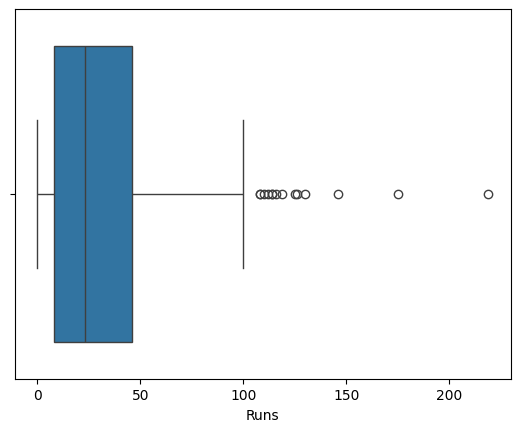

In [10]:
sns.boxplot(data = sehwag['Runs'],orient='h')

## Finding Upper and lower limit

In [11]:
supper = sp75 + 1.5*siqr
supper

103.0

In [12]:
slower = sp25 - 1.5*siqr
slower

-49.0

## Outliers 

In [13]:
sehwag_outliers = sehwag.loc[sehwag['Runs'] > supper]
sehwag_outliers

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
37,126,136,104,21,1,121.15,1,caught,2,NaN,v England,Colombo (RPS),22 Sep 2002,ODI # 1884
43,114,-,82,17,2,139.02,2,not out,2,NaN,v West Indies,Rajkot,12 Nov 2002,ODI # 1895
49,108,160,119,9,2,90.75,2,run out,2,NaN,v New Zealand,Napier,29 Dec 2002,ODI # 1927
53,112,175,139,11,3,80.57,2,caught,2,NaN,v New Zealand,Auckland,11 Jan 2003,ODI # 1933
75,130,193,134,15,2,97.01,1,caught,1,NaN,v New Zealand,Hyderabad (Deccan),15 Nov 2003,ODI # 2062
104,108,156,95,9,3,113.68,1,bowled,1,NaN,v Pakistan,Kochi,2 Apr 2005,ODI # 2235
163,114,127,87,17,3,131.03,3,caught,1,NaN,v Bermuda,Port of Spain,19 Mar 2007,ODI # 2542
182,119,150,95,12,5,125.26,2,caught,2,NaN,v Pakistan,Karachi,26 Jun 2008,ODI # 2717
192,116,165,90,17,0,128.88,1,run out,1,NaN,v Sri Lanka,Colombo (RPS),3 Feb 2009,ODI # 2813
198,125,106,74,14,6,168.91,2,not out,2,NaN,v New Zealand,Hamilton,11 Mar 2009,ODI # 2824


## Percentage of Outliers

In [14]:
spercentage_outliers = (sehwag_outliers['Runs'].count() / sehwag['Runs'].count()) * 100
spercentage_outliers

5.714285714285714

## So, Sehwag was outplayed over 6% of the times

# Analysis of Dravid data

In [15]:
dravid['Runs'].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [16]:
dp25 = np.percentile(dravid['Runs'],25)
print(dp25)
dp50 = np.percentile(dravid['Runs'],50)
print(dp50)
dp75 = np.percentile(dravid['Runs'],75)
print(dp75)
dp100 = np.percentile(dravid['Runs'],100)
print(dp100)

10.0
26.0
54.0
153.0


In [17]:
diqr = dp75 - dp25
diqr

44.0

C:\Data\Data_science\env\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Runs'>

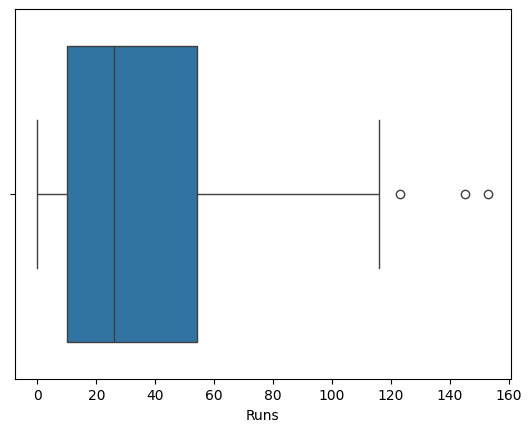

In [18]:
sns.boxplot(data=dravid['Runs'],orient='h')

In [19]:
dupper = dp75 + 1.5*diqr
dupper

120.0

In [20]:
dlower = dp25 + 1.5*diqr
dlower

76.0

In [21]:
dravid_outliers = dravid.loc[dravid['Runs'] > dupper]
dravid_outliers

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
58,123,201,123,10,1,100.0,3,not out,1,NaN,v New Zealand,Taupo,9 Jan 1999,ODI # 1378
76,145,179,129,17,1,112.4,3,run out,1,NaN,v Sri Lanka,Taunton,26 May 1999,ODI # 1463
97,153,196,153,15,2,100.0,3,caught,1,NaN,v New Zealand,Hyderabad (Deccan),8 Nov 1999,ODI # 1523


In [22]:
dpercentage_outliers = dravid_outliers['Runs'].count() / dravid['Runs'].count()
dpercentage_outliers*100

0.9433962264150944

# So, dravid was outplayed 1% of the times

In [23]:
sehwag['Runs'].sum()

8273

In [24]:
dravid['Runs'].sum()

10889

# So, dravid is more consistent that sehwag